# IMPORT DATA

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving seattle-weather.csv to seattle-weather (1).csv
Saving Power_Plant_Data.csv to Power_Plant_Data (1).csv


In [ ]:
import pandas as pd
df = pd.read_csv('seattle-weather.csv')
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


# EXERCISE 1

---


**Task1:**Add a new line to the existing temperature plot: Use the code provided to add a new line showing the minimum temperature over time, using a different color

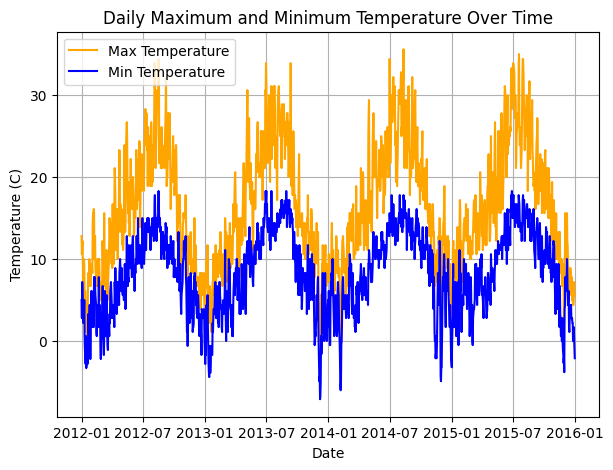

In [ ]:
import matplotlib.pyplot as plt
df['date'] = pd.to_datetime(df['date'])
plt.figure(figsize=(7,5))
plt.plot(df['date'], df['temp_max'], label='Max Temperature', color='orange')
plt.title('Daily Maximum and Minimum Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.plot(df['date'], df['temp_min'], label='Min Temperature', color='blue')
plt.grid(True)
plt.legend()
plt.show()

**Task 2:** Create two new plots: one for daily precipitation and one for wind speed over time.

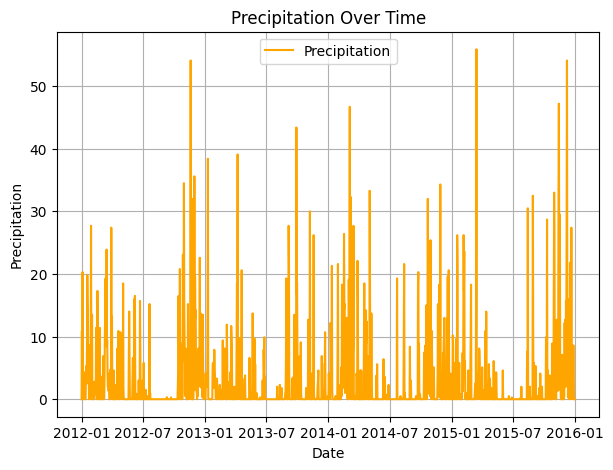

In [ ]:
import matplotlib.pyplot as plt
df['date'] = pd.to_datetime(df['date'])
plt.figure(figsize=(7,5))
plt.plot(df['date'], df['precipitation'], label='Precipitation', color='orange')
plt.title('Precipitation Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.grid(True)
plt.legend()
plt.show()

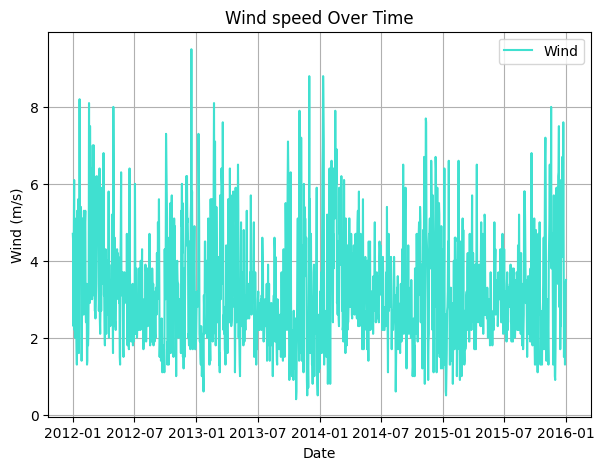

In [ ]:
import matplotlib.pyplot as plt
df['date'] = pd.to_datetime(df['date'])
plt.figure(figsize=(7,5))
plt.plot(df['date'], df['wind'], label='Wind', color='turquoise')
plt.title('Wind speed Over Time')
plt.xlabel('Date')
plt.ylabel('Wind (m/s)')
plt.grid(True)
plt.legend()
plt.show()

**Task 3:** Complete the code provided to compare temperature and wind in the same plot using
two y-axes.

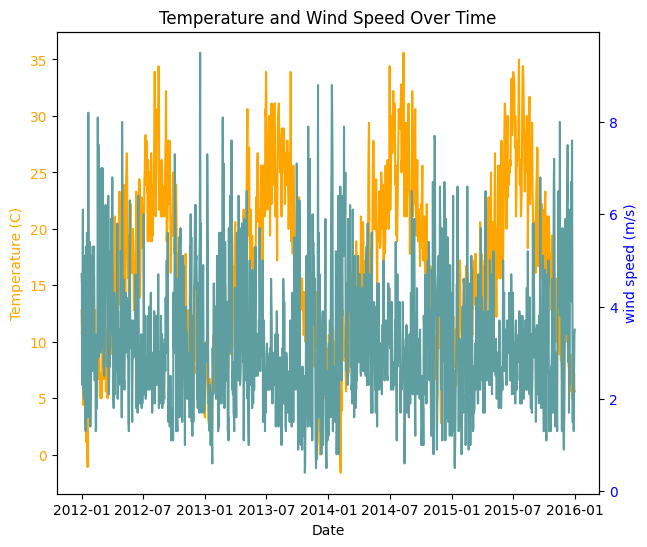

In [ ]:
import matplotlib.pyplot as plt
df['date'] = pd.to_datetime(df['date'])
# Create the figure and the first y-axis
fig, ax1 = plt.subplots(figsize=(7,6))
# Plot max temperature on the first y-axis
ax1.plot(df['date'], df['temp_max'], color='orange', label='Max Temperature')
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (C)', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')
# Create a second y-axis (Hint: use ax1.twinx())
ax2 = ax1.twinx()
# Plot another variable here, for example wind speed
ax2.plot(df['date'], df['wind'], color='cadetblue', label='Wind')
# Set the label and color for the second y-axis
ax2.set_ylabel('wind speed (m/s)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
# Add a title and display the plot
plt.title('Temperature and Wind Speed Over Time')
plt.show()

# EXERCISE 2

---
**Task 1:** Improve the readability of the given boxplot for one variable. Try changing the font
sizes of the axis labels and title, and customize the color of the boxplot.


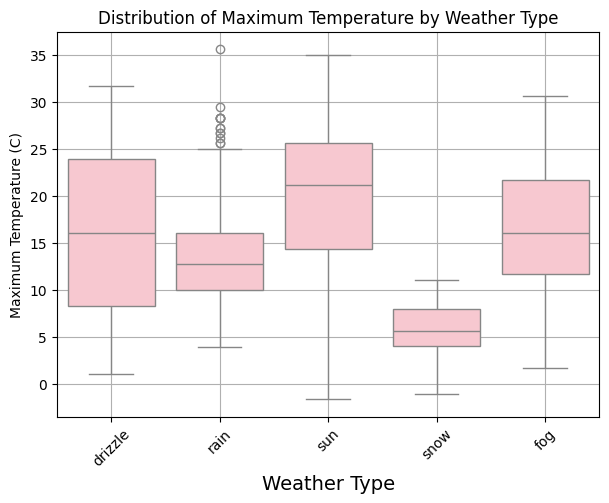

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
sns.boxplot(x='weather', y='temp_max', data=df,color='pink')
plt.title('Distribution of Maximum Temperature by Weather Type')
plt.xlabel('Weather Type',fontsize=14)
plt.ylabel('Maximum Temperature (C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Task 2:** Extend the previous code by creating a 2x2 grid of subplots. Each subplot should
display a boxplot showing the distribution of one variable:

*   Maximum temperature
*   Minimum temperature
*   Wind
*   Precipitation

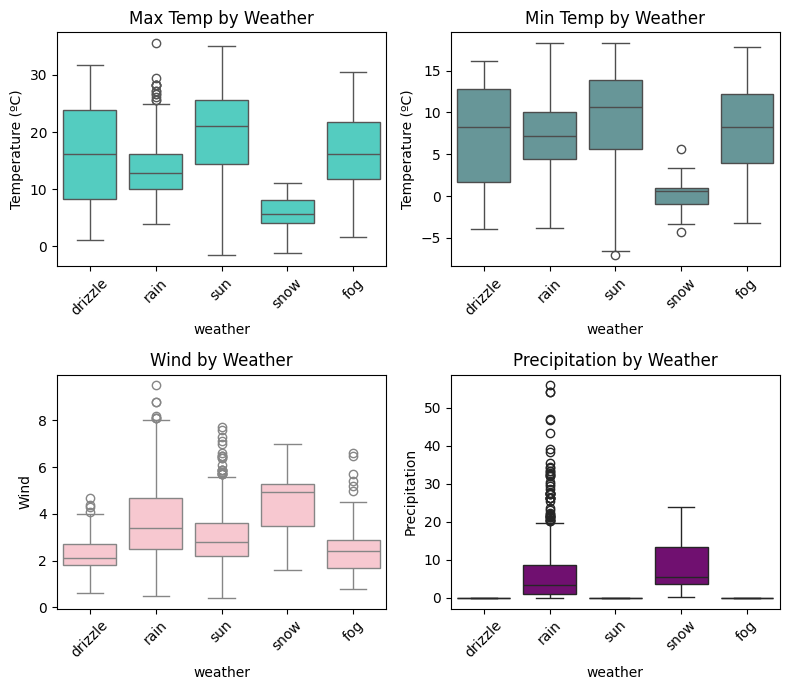

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, figsize=(8, 7))

# Plot 1: Maximum temperature vs weather
sns.boxplot(x='weather', y='temp_max', data=df, ax=axes[0, 0],color='turquoise')
axes[0, 0].set_title('Max Temp by Weather')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].set_ylabel('Temperature (ºC)')

# Plot 2: Minimum temperature vs weather
sns.boxplot(x='weather', y='temp_min', data=df, ax=axes[0, 1],color='cadetblue')
axes[0, 1].set_title('Min Temp by Weather')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].set_ylabel('Temperature (ºC)')

# Plot 3: Wind vs weather
sns.boxplot(x='weather', y='wind', data=df, ax=axes[1, 0],color='pink')
axes[1, 0].set_title('Wind by Weather')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].set_ylabel('Wind')

# Plot 4: Precipitation vs weather
sns.boxplot(x='weather', y='precipitation', data=df, ax=axes[1, 1],color='purple')
axes[1, 1].set_title('Precipitation by Weather')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].set_ylabel('Precipitation')
plt.tight_layout()
plt.show()


# EXERCISE 3

---
**Task 1:** Run the given code and check what accuracy you get.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# X: input features (precipitation, temp_max, temp_min, wind)
# y: output label (weather)
X = df[['precipitation', 'temp_max', 'temp_min', 'wind']]
y = df['weather']
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Calculate accuracy = correct predictions / total predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.726962457337884


**Task 2:** Replace the current model with a Random Forest and check if the accuracy improves.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# X: input features (precipitation, temp_max, temp_min, wind)
# y: output label (weather)
X = df[['precipitation', 'temp_max', 'temp_min', 'wind']]
y = df['weather']
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Calculate accuracy = correct predictions / total predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8122866894197952


**Task 3:** Scale the input features: Use a StandardScaler to scale the input features (X) before
splitting the data. Check whether the accuracy improves with scaling.

*   from sklearn.preprocessing import StandardScaler scaler
*   scaler = StandardScaler()
*   X scaled = scaler.fit transform(X)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# X: input features (precipitation, temp_max, temp_min, wind)
# y: output label (weather)
X = df[['precipitation', 'temp_max', 'temp_min', 'wind']]
y = df['weather']

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Calculate accuracy = correct predictions / total predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8122866894197952


**Conclusions**

Comparing the two codes between using scaled and not scaled data, the accuracy is more or less the same. This demonstrates, that for this case, the scaled data doesn't influence on the accuracy of the model.

# EXERCISE 4



---
**Task 1:** Load the file Power Plant Data.csv and visualize the relation between each input feature and the target variable.

*   Create a 2x2 scatter plot layout showing AT, V, AP and RH versus PE.




In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd
df = pd.read_csv('Power_Plant_Data.csv')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


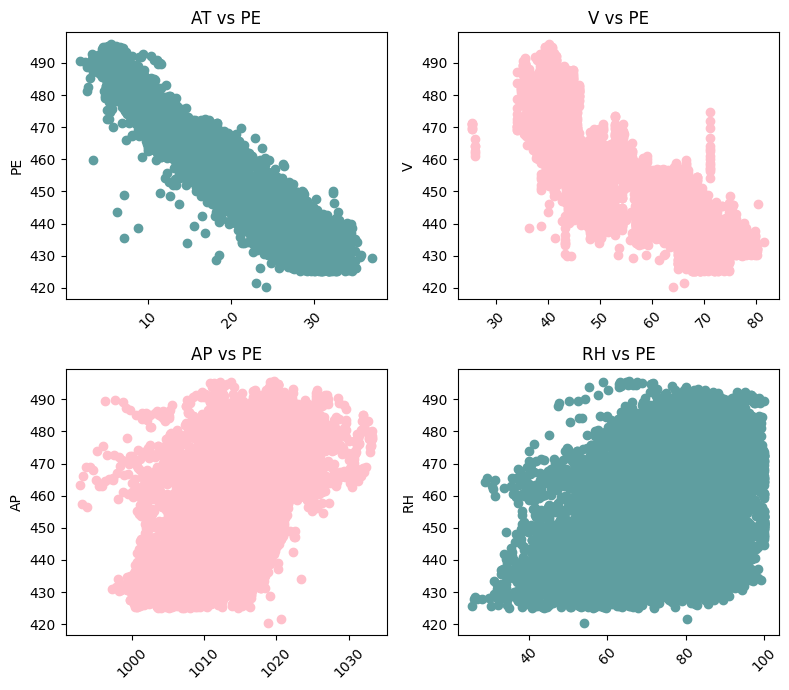

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, figsize=(8, 7))


# Plot 1: AT vs PE
axes[0, 0].scatter(df['AT'], df['PE'], label='PE', color='cadetblue')
axes[0, 0].set_title('AT vs PE')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].set_ylabel('PE')

# Plot 2: V vs PE
axes[0, 1].scatter(df['V'], df['PE'], label='PE', color='pink')
axes[0, 1].set_title('V vs PE')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].set_ylabel('V')

# Plot 3: AP vs PE
axes[1, 0].scatter(df['AP'], df['PE'], label='PE', color='pink')
axes[1, 0].set_title('AP vs PE')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].set_ylabel('AP')

# Plot 4: RH vs PE
axes[1, 1].scatter(df['RH'], df['PE'], label='PE', color='cadetblue')
axes[1, 1].set_title('RH vs PE')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].set_ylabel('RH')
plt.tight_layout()
plt.show()


**Task 2:** Train a regression model using LinearRegression().


*   Split the dataset into training and test sets (80/20 split).
*   Train the model and make predictions.
*   Calculate the Mean Squared Error (MSE) on the test set.
*   Tip: Use from sklearn.linear model import LinearRegression






In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# X: input features (precipitation, temp_max, temp_min, wind)
# y: output label (weather)
X = df[['AT', 'V', 'AP', 'RH']]
y = df['PE']

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

Mean squared error: 20.27370599968743


**Task 3:** Try other regression models and compare performance.
Train and evaluate at least two additional regression models:

*   DecisionTreeRegressor()
*   GradientBoostingRegressor()

For each model:

*   Train using the same train/test split.
*   Compute the Mean Squared Error (MSE).
*   Compare the results with the linear regression model









In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# X: input features (precipitation, temp_max, temp_min, wind)
# y: output label (weather)
X = df[['AT', 'V', 'AP', 'RH']]
y = df['PE']

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model with tree regressor
model1 = DecisionTreeRegressor()
model1.fit(X_train, y_train)

# Train the model gradient boost regressor
model2 = GradientBoostingRegressor()
model2.fit(X_train, y_train)

# Make predictions
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)

# Calculate MSE
mse1 = mean_squared_error(y_test, y_pred1)
mse2 = mean_squared_error(y_test, y_pred2)
print("DecisionTreeRegressor | Mean squared error:", mse1)
print("GradientBoostingRegressor | Mean squared error:", mse2)

DecisionTreeRegressor | Mean squared error: 20.18726729362591
GradientBoostingRegressor | Mean squared error: 14.669381080668163


As it can be seen, there is not a noticeable change in the MSE using the Decision Tree Regressor model. However, the results change for the gradient boost regressor model. In this case there is an improvement compared to the linear regression. As a conclusion, it is best to use the Gradient boost regressor model for this scenario.